<a href="https://colab.research.google.com/github/mkorlyakova/test-face-recognition/blob/main/hypothesis_0%261_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт модулей

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2 as cv


from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import scipy.stats as st

import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import Sequence

Подключение диска

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Путь к данным на локальном диске (облако)

In [ ]:
path_c = '/gdrive/MyDrive/Face recognition/'

## **Гипотеза 1 и 0:**

Случайная проекция 


Открываю данные на локальном диске виртуальной машины

Заполним данными для обучения и теста массив image и label

In [ ]:
image = []
label = []
path_train = '/content/casia_faces/'
dir_list = os.listdir(path_train)
m = 0
for name in dir_list[:100]:
  folder_list = os.listdir(path_train+name+'/')
  print(name)
  
  if len(folder_list)>0:
 
    for i,k in enumerate(folder_list):
      
      img = cv.imread(path_train+name+'/'+k,   )

      img = cv.resize(img,(32,32))
      imgl = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

      image.append(imgl.reshape(-1,32,32,1))
      label.append(m)
  
    m += 1


person_6656
person_5610
person_50
person_193
person_1529
person_8084
person_7886
person_3775
person_3539
person_1517
person_5087
person_1181
person_7050
person_6721
person_1694
person_6093
person_859
person_1454
person_4192
person_6120
person_4134
person_1999
person_9300
person_7342
person_7725
person_2766
person_7666
person_6992
person_1151
person_7094
person_8582
person_2702
person_3877
person_3700
person_4003
person_1160
person_6790
person_1562
person_9430
person_8961
person_2343
person_3171
person_6663
person_750
person_37


In [ ]:
image  = np.array(image)
label = np.array(label)

Прочитали 1954 объекта и их метки



Гипотеза 0

  - Случайная проекция 

In [ ]:
rand_project1 = keras.models.Sequential([keras.layers.Conv3D(64,3,1,padding='same',activation='relu', input_shape = (1,32,32,1)),
                                        
                                        keras.layers.Embedding(32*32*64,64,input_length=1),
                                        keras.layers.Flatten(), 
                                        keras.layers.Dense(32)])
rand_project1.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=False),metrics =['accuracy'])
rand_project1.save_weights(path_c+'LRP.h5')

Гипотеза 1:   
 - Случайная проекция обучена через классификатор конкретных классов

In [ ]:
rand_project = keras.models.Sequential([keras.layers.Conv3D(64,3,1,padding='same',activation='relu', input_shape = (1,32,32,1)),
                                        
                                        keras.layers.Embedding(32*32*64,64,input_length=1),
                                        keras.layers.Flatten(), 
                                        keras.layers.Dense(32),keras.layers.Dense(25),keras.layers.Softmax( )])
rand_project.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=False),metrics =['accuracy'])

Будем учить только плотный слой - сверточные слои не обучаем

In [ ]:

for i in range(3):
  rand_project.layers[i].trainable = False

rand_project.fit(image[:900],keras.utils.to_categorical(label[:900]),batch_size = 64, epochs = 10)  

Epoch 1/10
15/15 [==============================] - 66s 4s/step - loss: 193.9103 - accuracy: 0.0800
Epoch 2/10
15/15 [==============================] - 63s 4s/step - loss: 8.7499 - accuracy: 0.7044
Epoch 3/10
15/15 [==============================] - 62s 4s/step - loss: 0.3177 - accuracy: 0.9711
Epoch 4/10
15/15 [==============================] - 61s 4s/step - loss: 0.0072 - accuracy: 0.9956
Epoch 5/10
15/15 [==============================] - 62s 4s/step - loss: 6.2932e-05 - accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 61s 4s/step - loss: 1.2837e-05 - accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 63s 4s/step - loss: 9.5543e-06 - accuracy: 1.0000
Epoch 8/10
15/15 [==============================] - 60s 4s/step - loss: 5.9702e-06 - accuracy: 1.0000
Epoch 9/10
15/15 [==============================] - 61s 4s/step - loss: 3.6449e-06 - accuracy: 1.0000
Epoch 10/10
15/15 [==============================] - 60s 4s/step - loss: 2.2521e-06 - accuracy: 

Строим Эмбединг модель - rand_project без последних слоев

In [ ]:
mod = keras.models.Model(rand_project.inputs,rand_project.layers[-3].output)
mod.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1_input (InputLayer)  [(None, 1, 32, 32, 1)]   0         
                                                                 
 conv3d_1 (Conv3D)           (None, 1, 32, 32, 64)     1792      
                                                                 
 embedding_1 (Embedding)     (None, 1, 32, 32, 64, 64  4194304   
                             )                                   
                                                                 
 flatten_1 (Flatten)         (None, 4194304)           0         
                                                                 
 dense_1 (Dense)             (None, 32)                134217760 
                                                                 
Total params: 138,413,856
Trainable params: 134,217,760
Non-trainable params: 4,196,096
_____________________________________

In [ ]:
mod.save_weights(path_c+'LRP_net.h5')

Метрики:        




In [ ]:
# https://habr.com/ru/post/317798/

def calc_metrics(targets_scores, imposter_scores):
    """
    targets_scores - значения выхода модели через метрику для пар, 
    imposter_scores - значения выхода модели через метрику для не пар,
    """
    # диапазоны
    min_score = np.minimum(np.min(targets_scores), np.min(imposter_scores))
    max_score = np.maximum(np.max(targets_scores), np.max(imposter_scores))
    print(min_score,max_score)
    n_tars = len(targets_scores)
    n_imps = len(imposter_scores)

    N = 100

    fars = np.zeros((N,))
    frrs = np.zeros((N,))
    dists = np.zeros((N,))

    mink = float('inf')
    eer = 0
    min_i = 0
    # поиск оптимальной точки
    for i, dist in enumerate(np.linspace(min_score, max_score, N)):
        far = len(np.where(imposter_scores > dist)[0]) / n_imps
        frr = len(np.where(targets_scores < dist)[0]) / n_tars
        # добавили оценки по этому порогу для dist
        fars[i] = far
        frrs[i] = frr
        dists[i] = dist

        k = np.abs(far - frr)

        if k < mink:
            mink = k
            min_i = i
            eer = (far + frr) / 2
    # accuracy

    if n_tars>n_imps:
      nn = n_imps
    else:
      nn = n_tars
    TN = np.sum(imposter_scores[:nn] > dists[min_i]) 
    TP = np.sum(targets_scores[:nn] < dists[min_i])
    acc = (TP+TN)/(nn*2)


    return eer, fars, frrs, dists, min_i, acc
# вычисление метрики для вложеня (Euqlid)
def diff(e1, e2):
    return np.sum((e1 - e2)**2) ** 0.5
# cos
def diffc(e1, e2):
    return 1 - np.sum((e1 * e2))/np.sum( (e1**2)) ** 0.5/np.sum( (e2**2)) ** 0.5

# метрики по эмбедингу (вложению)
def my_embed_metric(X,L):
  net_dist = np.ones((X.shape[0],X.shape[0])) # нормированное расстояние - инициализация 1(пока)
  label_dist = np.ones((X.shape[0],X.shape[0])) # нормированное расстояние - инициализация 1(пока)
  for i in range(X.shape[0]-1):
    for j in range(i+1,X.shape[0]):
      net_dist[i,j] = diff( X[i,:],X[j,:])
      net_dist[j,i] =  net_dist[i,j]
      label_dist[i,j] = int(L[i] == L[j])
      label_dist[j,i] =  label_dist[i,j]


def image_clast_net(n_emb,l_dist,    verbose=1):
  '''
  полный цикл  анализа
  вход:
    n_emb, - расстояния
    l_dist, - метки
  
  гиперпараметры алгоритма:

,  
  
  verbose = 1 - визуализировать результат (0 - не визуализировать)


  
  ''' 

  # строим метрики
  if 1:

      # анализ 
      # делим по меткам пар на похожие и нет пары 
      Dist1 = []
      Dist0 = []
      for i in range(n_emb.shape[0]):
          if l_dist[i] :
            Dist1.append(n_emb[i])
          else:
            Dist0.append(n_emb[i])  
      if verbose:
        plt.figure(figsize = (16,5))
        plt.subplot(1,2,1)
        plt.hist(Dist0,alpha = 0.5,bins = 100, label = 'labeli!=labelj : 0')
        plt.hist(Dist1,alpha = 0.5,bins = 100, label = 'labeli==labelj : 1')
        plt.legend()
      
        plt.grid(True)
        plt.title('распределение рaсстояний по типам пар')
        plt.subplot(1,2,2)
        sns.kdeplot(Dist0,)
        sns.kdeplot(Dist1)
        plt.grid(True)
        plt.legend()
        plt.title('распределение рaсстояний по типам пар')
        plt.show()
      # среднее по выборке расстояние
      m0 = np.mean(Dist0)
      m1 = np.mean(Dist1)
      print('средняя дистанция по 0:',m0)
      print('средняя дистанция по 1:',m1)
      # std по выборкам
      d0 = np.std(Dist0)
      d1 = np.std(Dist1)
      # проверим сходство непараметрическими тестами
      L1 = len(Dist1)
      L0 = len(Dist0)
      if L1>L0:
        L_d01 = L0
      else:
        L_d01 = L1  
      print('std по 0:',d0)
      print('std по 1:',d1)
      conf_int0 = st.t.interval(0.99, len(Dist0)-1, loc=np.mean(Dist0), scale=st.sem(Dist0))
      conf_int1 = st.t.interval(0.99, len(Dist1)-1, loc=np.mean(Dist1), scale=st.sem(Dist1))
      print('доверит.интервал 0',conf_int0)
      print('доверит.интервал 1',conf_int1)
      print('интервал 3 sigms 0',[m0-d0*3,m0+d0*3])
      print('интервал 3 sigma 1',[m1-d1*3,m1+d1*3])
      if verbose:
        plt.plot([0,0,0],[conf_int0[0],m0,conf_int0[1]],'-og', label='0')
        plt.plot([1,1,1],[conf_int1[0],m1,conf_int1[1]], '-ok',label='1')
        plt.plot([0,0,0],[m0-d0,m0,m0+d0],'--xb', label='+-sigma 0')
        plt.plot([1,1,1],[m1-d1,m1,m1+d1], '--xr',label='+-sigma 1')
        plt.legend()
        plt.title('доверит.интервал по типам пар и +-sig')
        plt.show()
      wc = wilcoxon(Dist1[:L_d01],Dist0[:L_d01])[1]
      mu = mannwhitneyu(Dist1,Dist0)[1]
      print('тест Мана-Уитни p_value:', mu)
      print('тест Вилкокса p_value:', wc)
      stat_rez = [m0,m1,d0,d1,conf_int0[0],conf_int0[1],conf_int1[0],conf_int1[1],mu,wc,m0-d0*3,m0+d0*3,m1-d1*3,m1+d1*3]
      
      eer, fars, frrs, dists, min_i, acc = calc_metrics(Dist1,Dist0)
      plt.plot(fars,frrs)
      plt.plot(fars[min_i],frrs[min_i],'or')
      plt.grid(True)
      plt.legend()
      plt.title('FAR/FRR')
      plt.xlabel('FAR')
      plt.ylabel('FRR')
      plt.show()

  return  stat_rez, eer,acc

Сделаю несколько моделей поменьше проверить как они работают в таком формате:

In [ ]:
# вернем данные для обучения 

image = []
label = []
path_train = '/content/casia_faces/'
dir_list = os.listdir(path_train)
m = 0
for name in dir_list[:100]:
  folder_list = os.listdir(path_train+name+'/')
  print(name)
  
  if len(folder_list)>0:
 
    for i,k in enumerate(folder_list):
      
      img = cv.imread(path_train+name+'/'+k,   )

      img = cv.resize(img,(32,32))
      imgl = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

      image.append(imgl.reshape(-1,32,32,1))
      label.append(m)
  
    m += 1

person_6656
person_5610
person_50
person_193
person_1529
person_8084
person_7886
person_3775
person_3539
person_1517
person_5087
person_1181
person_7050
person_6721
person_1694
person_6093
person_859
person_1454
person_4192
person_6120
person_4134
person_1999
person_9300
person_7342
person_7725
person_2766
person_7666
person_6992
person_1151
person_7094
person_8582
person_2702
person_3877
person_3700
person_4003
person_1160
person_6790
person_1562
person_9430
person_8961
person_2343
person_3171
person_6663
person_750
person_37


Модель для настройки

In [ ]:

def rand_class(levels_c = [64,32,32],level_d = [32,25] ):
  """
  передаем список числа фильтров в свертках -levels_c
  передаем список числа нейронов в плотных слоях -levels_d 
  """
  rand_project = keras.models.Sequential([keras.layers.Conv3D(levels_c[0],3,1,padding='same',activation='relu', input_shape = (1,32,32,1))])
  for i in levels_c[1:]:
    rand_project.add(keras.layers.Conv2D(i,3,1,padding='same',activation='relu'))
    rand_project.add(keras.layers.Conv2D(i,3,2,padding='same',activation='relu'))
  rand_project.add(keras.layers.Flatten())
  for i in level_d:
    rand_project.add(keras.layers.Dense(i))
    
  rand_project.add(keras.layers.Dense(level_d[1],activation='sigmoid'))
  rand_project.add(keras.layers.Dense(level_d[1]))
  rand_project.add(keras.layers.Softmax( ))
  
  rand_project.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=False),metrics =['accuracy'])
  # Свертки не обучаем
  for i in range(3):
    rand_project.layers[i].trainable = False

  return rand_project



In [ ]:
rez1 = pd.DataFrame(np.zeros((10,6)), columns = ['c1','c2','c3','d1','acc','eer'])



In [ ]:
label=np.array(label)
image = np.array(image)

In [ ]:
ind = list(range(len(label[1000:])))
ind1 = ind[::2] + np.random.choice(ind,size=(500,)).tolist()
ind2 = ind[1::2] + np.random.choice(ind,size=(500,)).tolist()

labe_ = np.array(label[ind1] == label[ind2]).astype(int)

np.sum(labe_)/len(labe_)

0.503582395087001

Epoch 1/10
15/15 [==============================] - 4s 151ms/step - loss: 3.1654 - accuracy: 0.0856
Epoch 2/10
15/15 [==============================] - 2s 148ms/step - loss: 3.0597 - accuracy: 0.1311
Epoch 3/10
15/15 [==============================] - 2s 150ms/step - loss: 3.0050 - accuracy: 0.1444
Epoch 4/10
15/15 [==============================] - 2s 152ms/step - loss: 2.9809 - accuracy: 0.1556
Epoch 5/10
15/15 [==============================] - 2s 149ms/step - loss: 2.9354 - accuracy: 0.1844
Epoch 6/10
15/15 [==============================] - 2s 149ms/step - loss: 2.8818 - accuracy: 0.1889
Epoch 7/10
15/15 [==============================] - 2s 149ms/step - loss: 2.8507 - accuracy: 0.1967
Epoch 8/10
15/15 [==============================] - 2s 148ms/step - loss: 2.7391 - accuracy: 0.2344
Epoch 9/10
15/15 [==============================] - 2s 149ms/step - loss: 2.6601 - accuracy: 0.2633
Epoch 10/10
15/15 [==============================] - 2s 144ms/step - loss: 2.5524 - accuracy: 0.3100

No handles with labels found to put in legend.


средняя дистанция по 0: 2.4356762466477146
средняя дистанция по 1: 2.2545037527455927
std по 0: 0.5406509706903702
std по 1: 0.5968566484930907
доверит.интервал 0 (2.372124561260643, 2.499227932034786)
доверит.интервал 1 (2.1848511171702736, 2.3241563883209118)
интервал 3 sigms 0 [0.8137233345766042, 4.057629158718825]
интервал 3 sigma 1 [0.4639338072663204, 4.045073698224865]
тест Мана-Уитни p_value: 2.934995762414279e-06
тест Вилкокса p_value: 1.923270648333238e-06
0.0 3.9346812013180763


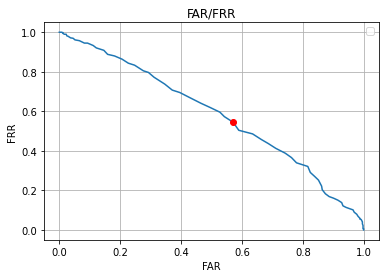

[7, 19, 19] [40, 25]
Accuracy для mod: 0.5556701030927835
ERR для mod: 0.5579247338865141
Epoch 1/10
15/15 [==============================] - 4s 149ms/step - loss: 3.0742 - accuracy: 0.1322
Epoch 2/10
15/15 [==============================] - 2s 147ms/step - loss: 2.8868 - accuracy: 0.1800
Epoch 3/10
15/15 [==============================] - 2s 149ms/step - loss: 2.7434 - accuracy: 0.2500
Epoch 4/10
15/15 [==============================] - 2s 143ms/step - loss: 2.6144 - accuracy: 0.3044
Epoch 5/10
15/15 [==============================] - 2s 143ms/step - loss: 2.4816 - accuracy: 0.3289
Epoch 6/10
15/15 [==============================] - 2s 142ms/step - loss: 2.4007 - accuracy: 0.3556
Epoch 7/10
15/15 [==============================] - 2s 145ms/step - loss: 2.3065 - accuracy: 0.4033
Epoch 8/10
15/15 [==============================] - 2s 148ms/step - loss: 2.2061 - accuracy: 0.4333
Epoch 9/10
15/15 [==============================] - 2s 148ms/step - loss: 2.1169 - accuracy: 0.4600
Epoch 10/1

No handles with labels found to put in legend.


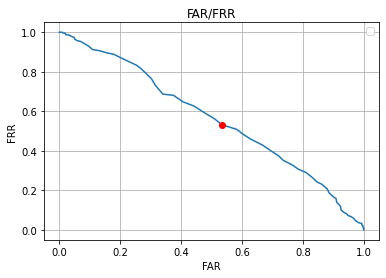

[6, 24, 10] [25, 25]
Accuracy для mod: 0.5319587628865979
ERR для mod: 0.5332704718799766
Epoch 1/10
15/15 [==============================] - 3s 129ms/step - loss: 3.1176 - accuracy: 0.1311
Epoch 2/10
15/15 [==============================] - 2s 131ms/step - loss: 2.9820 - accuracy: 0.1511
Epoch 3/10
15/15 [==============================] - 2s 129ms/step - loss: 2.8580 - accuracy: 0.2067
Epoch 4/10
15/15 [==============================] - 2s 130ms/step - loss: 2.7609 - accuracy: 0.2533
Epoch 5/10
15/15 [==============================] - 2s 128ms/step - loss: 2.6653 - accuracy: 0.2944
Epoch 6/10
15/15 [==============================] - 2s 130ms/step - loss: 2.5903 - accuracy: 0.3000
Epoch 7/10
15/15 [==============================] - 2s 130ms/step - loss: 2.4910 - accuracy: 0.3522
Epoch 8/10
15/15 [==============================] - 2s 130ms/step - loss: 2.4181 - accuracy: 0.3678
Epoch 9/10
15/15 [==============================] - 2s 129ms/step - loss: 2.3103 - accuracy: 0.3978
Epoch 10/1

No handles with labels found to put in legend.


средняя дистанция по 0: 2.3735583903330397
средняя дистанция по 1: 2.333570084673152
std по 0: 0.6494650200814518
std по 1: 0.660980975558819
доверит.интервал 0 (2.2972159830061463, 2.449900797659933)
доверит.интервал 1 (2.2564341976405555, 2.4107059717057484)
интервал 3 sigms 0 [0.42516333008868434, 4.321953450577395]
интервал 3 sigma 1 [0.3506271579966951, 4.316513011349609]
тест Мана-Уитни p_value: 0.15671171034838877
тест Вилкокса p_value: 0.3717156371222977
0.0 4.415443514950205


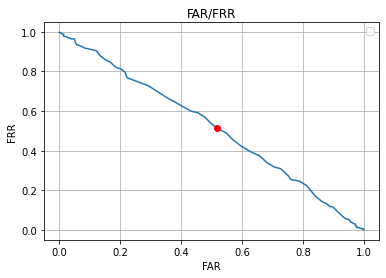

[13, 4, 22] [20, 25]
Accuracy для mod: 0.5144329896907216
ERR для mod: 0.5158913754085994
Epoch 1/10
15/15 [==============================] - 4s 151ms/step - loss: 3.2252 - accuracy: 0.1000
Epoch 2/10
15/15 [==============================] - 2s 151ms/step - loss: 3.0425 - accuracy: 0.1422
Epoch 3/10
15/15 [==============================] - 2s 151ms/step - loss: 2.9330 - accuracy: 0.1922
Epoch 4/10
15/15 [==============================] - 2s 149ms/step - loss: 2.8186 - accuracy: 0.2144
Epoch 5/10
15/15 [==============================] - 2s 150ms/step - loss: 2.7547 - accuracy: 0.2344
Epoch 6/10
15/15 [==============================] - 2s 151ms/step - loss: 2.6664 - accuracy: 0.2522
Epoch 7/10
15/15 [==============================] - 2s 150ms/step - loss: 2.5989 - accuracy: 0.2878
Epoch 8/10
15/15 [==============================] - 2s 149ms/step - loss: 2.5398 - accuracy: 0.2989
Epoch 9/10
15/15 [==============================] - 2s 151ms/step - loss: 2.4788 - accuracy: 0.3133
Epoch 10/1

No handles with labels found to put in legend.


средняя дистанция по 0: 2.6791446261786276
средняя дистанция по 1: 2.6128157755644303
std по 0: 0.6008169692169948
std по 1: 0.64721404715707
доверит.интервал 0 (2.6085206320070538, 2.7497686203502014)
доверит.интервал 1 (2.53728647672915, 2.688345074399711)
интервал 3 sigms 0 [0.8766937185276431, 4.481595533829612]
интервал 3 sigma 1 [0.6711736340932204, 4.5544579170356405]
тест Мана-Уитни p_value: 0.04513114415067715
тест Вилкокса p_value: 0.2780796183185509
0.0 4.251527399593256


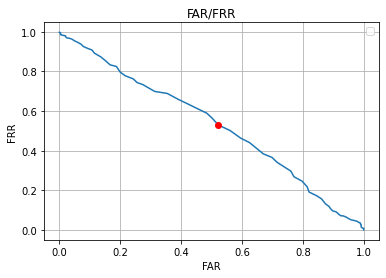

[14, 13, 11] [20, 25]
Accuracy для mod: 0.5247422680412371
ERR для mod: 0.5260686447070657
Epoch 1/10
15/15 [==============================] - 4s 145ms/step - loss: 3.1129 - accuracy: 0.1033
Epoch 2/10
15/15 [==============================] - 2s 145ms/step - loss: 2.9749 - accuracy: 0.1533
Epoch 3/10
15/15 [==============================] - 2s 147ms/step - loss: 2.8979 - accuracy: 0.1822
Epoch 4/10
15/15 [==============================] - 2s 142ms/step - loss: 2.8385 - accuracy: 0.2122
Epoch 5/10
15/15 [==============================] - 2s 145ms/step - loss: 2.7591 - accuracy: 0.2478
Epoch 6/10
15/15 [==============================] - 2s 145ms/step - loss: 2.7191 - accuracy: 0.2356
Epoch 7/10
15/15 [==============================] - 2s 147ms/step - loss: 2.6478 - accuracy: 0.2789
Epoch 8/10
15/15 [==============================] - 2s 146ms/step - loss: 2.5753 - accuracy: 0.2911
Epoch 9/10
15/15 [==============================] - 2s 144ms/step - loss: 2.5168 - accuracy: 0.3056
Epoch 10/

No handles with labels found to put in legend.


средняя дистанция по 0: 2.755079458324521
средняя дистанция по 1: 2.595704662349018
std по 0: 0.6253142013282452
std по 1: 0.6933410909594406
доверит.интервал 0 (2.6815758977184316, 2.82858301893061)
доверит.интервал 1 (2.51479237887204, 2.676616945825996)
интервал 3 sigms 0 [0.8791368543397851, 4.631022062309256]
интервал 3 sigma 1 [0.515681389470696, 4.675727935227339]
тест Мана-Уитни p_value: 0.00044048993501480334
тест Вилкокса p_value: 0.00038395204628269866
0.0 4.4919926078647245


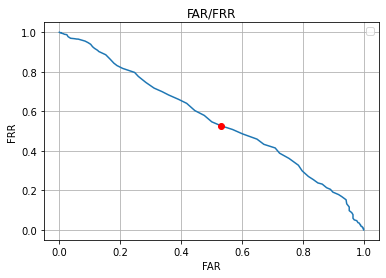

[8, 22, 4] [11, 25]
Accuracy для mod: 0.5298969072164949
ERR для mod: 0.52919076355712
Epoch 1/10
15/15 [==============================] - 4s 182ms/step - loss: 3.1709 - accuracy: 0.1011
Epoch 2/10
15/15 [==============================] - 3s 186ms/step - loss: 3.0610 - accuracy: 0.1333
Epoch 3/10
15/15 [==============================] - 3s 181ms/step - loss: 2.9599 - accuracy: 0.1878
Epoch 4/10
15/15 [==============================] - 3s 181ms/step - loss: 2.9218 - accuracy: 0.2022
Epoch 5/10
15/15 [==============================] - 3s 182ms/step - loss: 2.8774 - accuracy: 0.2111
Epoch 6/10
15/15 [==============================] - 3s 182ms/step - loss: 2.8286 - accuracy: 0.2244
Epoch 7/10
15/15 [==============================] - 3s 182ms/step - loss: 2.7779 - accuracy: 0.2300
Epoch 8/10
15/15 [==============================] - 3s 182ms/step - loss: 2.7389 - accuracy: 0.2456
Epoch 9/10
15/15 [==============================] - 3s 181ms/step - loss: 2.6835 - accuracy: 0.2733
Epoch 10/10
1

No handles with labels found to put in legend.


средняя дистанция по 0: 2.2961729211464275
средняя дистанция по 1: 2.1896888317069307
std по 0: 0.5362395296717408
std по 1: 0.591077868286302
доверит.интервал 0 (2.2331397856684805, 2.3592060566243744)
доверит.интервал 1 (2.12071057459892, 2.2586670888149416)
интервал 3 sigms 0 [0.687454332131205, 3.90489151016165]
интервал 3 sigma 1 [0.4164552268480246, 3.9629224365658366]
тест Мана-Уитни p_value: 0.008023201199470236
тест Вилкокса p_value: 0.011644476720053925
0.0 3.6377397490993957


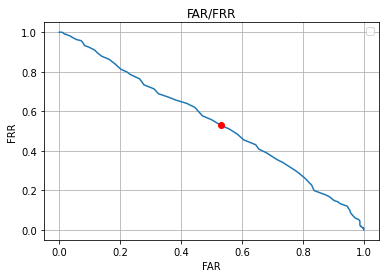

[14, 24, 7] [47, 25]
Accuracy для mod: 0.5309278350515464
ERR для mod: 0.5302070237197217
Epoch 1/10
15/15 [==============================] - 5s 205ms/step - loss: 3.1959 - accuracy: 0.0944
Epoch 2/10
15/15 [==============================] - 3s 205ms/step - loss: 3.1574 - accuracy: 0.1100
Epoch 3/10
15/15 [==============================] - 3s 203ms/step - loss: 3.0741 - accuracy: 0.1300
Epoch 4/10
15/15 [==============================] - 3s 206ms/step - loss: 3.0172 - accuracy: 0.1300
Epoch 5/10
15/15 [==============================] - 3s 206ms/step - loss: 2.9952 - accuracy: 0.1300
Epoch 6/10
15/15 [==============================] - 3s 204ms/step - loss: 2.9822 - accuracy: 0.1300
Epoch 7/10
15/15 [==============================] - 3s 198ms/step - loss: 2.9745 - accuracy: 0.1311
Epoch 8/10
15/15 [==============================] - 3s 200ms/step - loss: 2.9705 - accuracy: 0.1456
Epoch 9/10
15/15 [==============================] - 3s 198ms/step - loss: 2.9672 - accuracy: 0.1456
Epoch 10/1

No handles with labels found to put in legend.


средняя дистанция по 0: 3.0213164001190023e-05
средняя дистанция по 1: 0.0001368456436150661
std по 0: 0.00037672556810090514
std по 1: 0.001980513626464653
доверит.интервал 0 (-1.4069647052756692e-05, 7.449597505513674e-05)
доверит.интервал 1 (-9.427852032677648e-05, 0.0003679698075569087)
интервал 3 sigms 0 [-0.0010999635403015253, 0.0011603898683039055]
интервал 3 sigma 1 [-0.005804695235778893, 0.006078386523009025]
тест Мана-Уитни p_value: 0.04662641760969137
тест Вилкокса p_value: 0.5814227049772996
0.0 0.042940348482893444


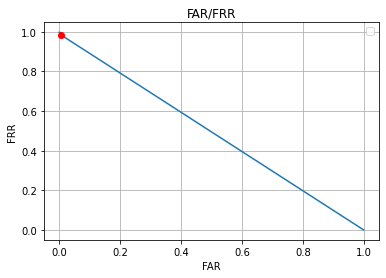

[11, 27, 26] [37, 25]
Accuracy для mod: 0.49587628865979383
ERR для mod: 0.49496270220434163
Epoch 1/10
15/15 [==============================] - 4s 138ms/step - loss: 3.1573 - accuracy: 0.1078
Epoch 2/10
15/15 [==============================] - 2s 138ms/step - loss: 2.9577 - accuracy: 0.1844
Epoch 3/10
15/15 [==============================] - 2s 143ms/step - loss: 2.8109 - accuracy: 0.2356
Epoch 4/10
15/15 [==============================] - 2s 136ms/step - loss: 2.7117 - accuracy: 0.2711
Epoch 5/10
15/15 [==============================] - 2s 136ms/step - loss: 2.5892 - accuracy: 0.3022
Epoch 6/10
15/15 [==============================] - 2s 139ms/step - loss: 2.5288 - accuracy: 0.3167
Epoch 7/10
15/15 [==============================] - 2s 137ms/step - loss: 2.4431 - accuracy: 0.3389
Epoch 8/10
15/15 [==============================] - 2s 137ms/step - loss: 2.3926 - accuracy: 0.3456
Epoch 9/10
15/15 [==============================] - 2s 140ms/step - loss: 2.2954 - accuracy: 0.3767
Epoch 1

No handles with labels found to put in legend.


средняя дистанция по 0: 2.72505561548657
средняя дистанция по 1: 2.5579071678911083
std по 0: 0.612386413392027
std по 1: 0.6410896170719339
доверит.интервал 0 (2.6530716724456247, 2.797039558527515)
доверит.интервал 1 (2.483092584553935, 2.6327217512282814)
интервал 3 sigms 0 [0.8878963753104889, 4.562214855662651]
интервал 3 sigma 1 [0.6346383166753067, 4.481176019106909]
тест Мана-Уитни p_value: 6.287500915044553e-05
тест Вилкокса p_value: 0.00017454649776092143
0.0 4.179386762691173


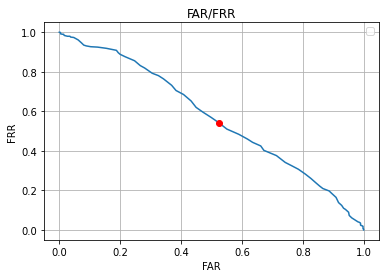

[11, 10, 5] [36, 25]
Accuracy для mod: 0.5329896907216495
ERR для mod: 0.533197133517727
Epoch 1/10
15/15 [==============================] - 3s 107ms/step - loss: 3.1619 - accuracy: 0.0922
Epoch 2/10
15/15 [==============================] - 2s 107ms/step - loss: 3.0335 - accuracy: 0.1244
Epoch 3/10
15/15 [==============================] - 2s 110ms/step - loss: 2.9790 - accuracy: 0.1389
Epoch 4/10
15/15 [==============================] - 2s 106ms/step - loss: 2.8910 - accuracy: 0.1922
Epoch 5/10
15/15 [==============================] - 2s 110ms/step - loss: 2.7494 - accuracy: 0.2744
Epoch 6/10
15/15 [==============================] - 2s 110ms/step - loss: 2.6353 - accuracy: 0.3111
Epoch 7/10
15/15 [==============================] - 2s 107ms/step - loss: 2.5230 - accuracy: 0.3422
Epoch 8/10
15/15 [==============================] - 2s 109ms/step - loss: 2.4355 - accuracy: 0.3744
Epoch 9/10
15/15 [==============================] - 2s 109ms/step - loss: 2.2936 - accuracy: 0.4167
Epoch 10/10

No handles with labels found to put in legend.


средняя дистанция по 0: 2.778947860440643
средняя дистанция по 1: 2.595543582648019
std по 0: 0.5721684188514695
std по 1: 0.5813372440279229
доверит.интервал 0 (2.7116914060652166, 2.846204314816069)
доверит.интервал 1 (2.527702047654871, 2.663385117641167)
интервал 3 sigms 0 [1.0624426038862342, 4.495453116995051]
интервал 3 sigma 1 [0.8515318505642502, 4.339555314731788]
тест Мана-Уитни p_value: 1.536036195214982e-06
тест Вилкокса p_value: 6.6215544073847424e-06
0.0 4.329397517129621


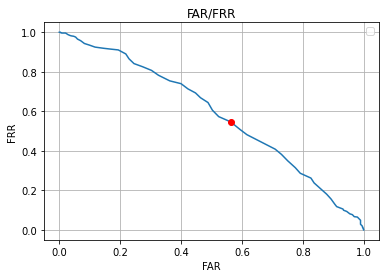

[4, 5, 19] [62, 25]
Accuracy для mod: 0.5536082474226804
ERR для mod: 0.5548172827089095
Epoch 1/10
15/15 [==============================] - 3s 130ms/step - loss: 3.1362 - accuracy: 0.1356
Epoch 2/10
15/15 [==============================] - 2s 132ms/step - loss: 3.1197 - accuracy: 0.1167
Epoch 3/10
15/15 [==============================] - 2s 128ms/step - loss: 3.0702 - accuracy: 0.1233
Epoch 4/10
15/15 [==============================] - 2s 132ms/step - loss: 3.0221 - accuracy: 0.1456
Epoch 5/10
15/15 [==============================] - 2s 132ms/step - loss: 2.9956 - accuracy: 0.1422
Epoch 6/10
15/15 [==============================] - 2s 133ms/step - loss: 3.0106 - accuracy: 0.1456
Epoch 7/10
15/15 [==============================] - 2s 129ms/step - loss: 2.9965 - accuracy: 0.1456
Epoch 8/10
15/15 [==============================] - 2s 131ms/step - loss: 2.9770 - accuracy: 0.1456
Epoch 9/10
15/15 [==============================] - 2s 129ms/step - loss: 2.9681 - accuracy: 0.1456
Epoch 10/10

No handles with labels found to put in legend.


средняя дистанция по 0: 1.924136363491283e-20
средняя дистанция по 1: 3.406263959267832e-08
std по 0: 3.362694140452914e-19
std по 1: 7.547776740444025e-07
доверит.интервал 0 (-2.0285963911383423e-20, 5.876869118120909e-20)
доверит.интервал 1 (-5.401923802958331e-08, 1.2214451721493996e-07)
интервал 3 sigms 0 [-9.895668785009613e-19, 1.028049605770787e-18]
интервал 3 sigma 1 [-2.2302703825405294e-06, 2.2983956617258858e-06]
тест Мана-Уитни p_value: 0.2666558953264894
тест Вилкокса p_value: 0.2355865105540188
0.0 1.67588186791532e-05


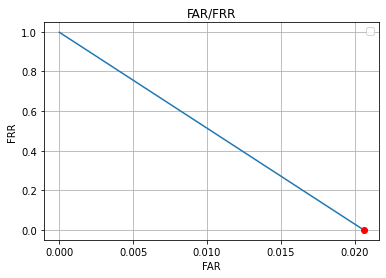

[7, 8, 25] [55, 25]
Accuracy для mod: 0.010309278350515464
ERR для mod: 0.010309278350515464


In [ ]:

for i in range(10):
  conv = [np.random.randint(4,16),np.random.randint(4,32),np.random.randint(4,32)]
  den = [np.random.randint(8,64),25]
  rand_project = rand_class(levels_c = conv,level_d = den )
  rand_project.fit(image[:900],keras.utils.to_categorical(label[:900]),batch_size = 64, epochs = 10)
  mod = keras.models.Model(rand_project.inputs,rand_project.layers[-3].output)

  f_new = mod.predict(image[1000:,:,:,:])
  dist = []
  
  for nn in zip(ind1,ind2):

    dist.append(diff(f_new[nn[1],:],f_new[nn[0],:]))

  dist = np.array(dist)
  stat_rand, eer_rand,acc_rand = image_clast_net(dist,labe_,    verbose=0)

  print(conv,den)
  print('Accuracy для mod:', acc_rand)
  print('ERR для mod:', eer_rand)
  rez1.iloc[i,:] = conv+den[:1]+[eer_rand,acc_rand]





Результаты моделирования 

In [ ]:
rez

,c1,c2,c3,d1,acc,eer
0,32.0,17.0,21.0,12.0,0.520015,0.520619
1,26.0,22.0,23.0,10.0,0.543521,0.541237
2,47.0,23.0,29.0,16.0,0.498011,0.498969
3,48.0,27.0,30.0,24.0,0.498984,0.498969
4,41.0,29.0,8.0,25.0,0.538381,0.538144
5,41.0,25.0,20.0,11.0,0.532313,0.530928
6,19.0,19.0,17.0,16.0,0.551680,0.551546
7,55.0,29.0,18.0,14.0,0.529117,0.528866
8,19.0,28.0,18.0,17.0,0.523020,0.520619
9,37.0,8.0,19.0,16.0,0.549604,0.549485


In [ ]:
rez1

,c1,c2,c3,d1,acc,eer
0,7.0,19.0,19.0,40.0,0.557925,0.555670
1,6.0,24.0,10.0,25.0,0.533270,0.531959
2,13.0,4.0,22.0,20.0,0.515891,0.514433
3,14.0,13.0,11.0,20.0,0.526069,0.524742
4,8.0,22.0,4.0,11.0,0.529191,0.529897
5,14.0,24.0,7.0,47.0,0.530207,0.530928
6,11.0,27.0,26.0,37.0,0.494963,0.495876
7,11.0,10.0,5.0,36.0,0.533197,0.532990
8,4.0,5.0,19.0,62.0,0.554817,0.553608
9,7.0,8.0,25.0,55.0,0.010309,0.010309


Результаты анализа гипотез 0 и 1:

  - Гипотеза 0 - провальная
  - гипотеза 1 - можно учить (брать разные классы у учить верхние слои  - брать большой вектор на выходе)



  Финальная модель по Гипотезе 1:

Epoch 1/20
16/16 [==============================] - 2s 154ms/step - loss: 1.6630 - accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 2s 155ms/step - loss: 1.6155 - accuracy: 0.6300
Epoch 3/20
16/16 [==============================] - 3s 157ms/step - loss: 1.5755 - accuracy: 0.6500
Epoch 4/20
16/16 [==============================] - 2s 155ms/step - loss: 1.5359 - accuracy: 0.6540
Epoch 5/20
16/16 [==============================] - 3s 155ms/step - loss: 1.4637 - accuracy: 0.6900
Epoch 6/20
16/16 [==============================] - 2s 157ms/step - loss: 1.4373 - accuracy: 0.6910
Epoch 7/20
16/16 [==============================] - 2s 156ms/step - loss: 1.4006 - accuracy: 0.7030
Epoch 8/20
16/16 [==============================] - 2s 155ms/step - loss: 1.3308 - accuracy: 0.7230
Epoch 9/20
16/16 [==============================] - 2s 153ms/step - loss: 1.2842 - accuracy: 0.7300
Epoch 10/20
16/16 [==============================] - 2s 156ms/step - loss: 1.2405 - accuracy: 0.7410

No handles with labels found to put in legend.


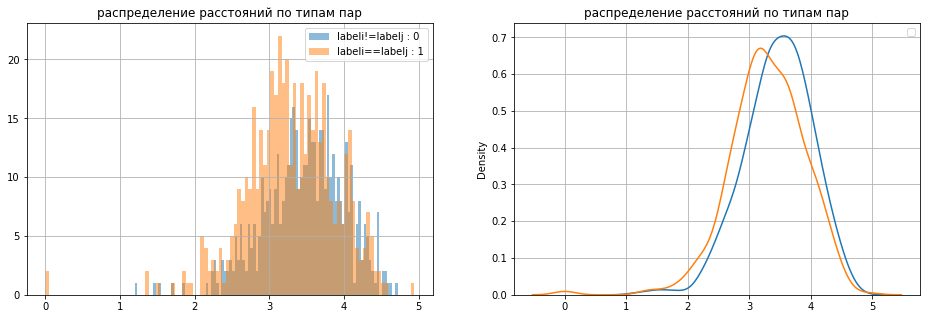

средняя дистанция по 0: 3.464045488054889
средняя дистанция по 1: 3.2883909305191996
std по 0: 0.5486071621536142
std по 1: 0.6075045464691206
доверит.интервал 0 (3.399558579382995, 3.5285323967267828)
доверит.интервал 1 (3.2174956947998763, 3.359286166238523)
интервал 3 sigms 0 [1.8182240015940465, 5.1098669745157315]
интервал 3 sigma 1 [1.465877291111838, 5.110904569926561]


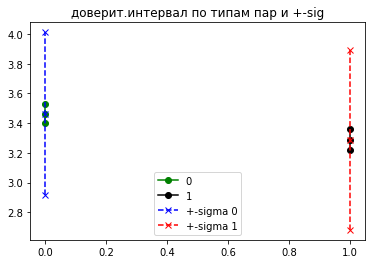

No handles with labels found to put in legend.


тест Мана-Уитни p_value: 8.54011206546227e-07
тест Вилкокса p_value: 1.6724565604404395e-07
0.0 4.940669913332086


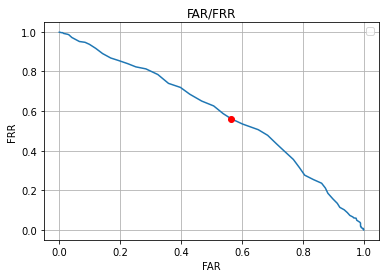

[16, 8, 16, 16] [128, 30]
Accuracy для mod: 0.5628865979381443
ERR для mod: 0.5629620316821725


In [ ]:
if 1:
  conv = [16,8,16,16]
  den = [128,30]
  #rand_project = rand_class(levels_c = conv,level_d = den )
  rand_project.fit(image[:1000],keras.utils.to_categorical(label[:1000]),batch_size = 64, epochs = 20)
  mod = keras.models.Model(rand_project.inputs,rand_project.layers[-3].output)

  f_new = mod.predict(image[1000:,:,:,:])
  dist = []
  
  for nn in zip(ind1,ind2):

    dist.append(diff(f_new[nn[1],:],f_new[nn[0],:]))

  dist = np.array(dist)
  stat_rand, eer_rand,acc_rand = image_clast_net(dist,labe_,    verbose=1)

  print(conv,den)
  print('Accuracy для mod:', acc_rand)
  print('ERR для mod:', eer_rand)
  

In [ ]:
rand_project.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_39 (Conv3D)          (None, 1, 32, 32, 16)     448       
                                                                 
 conv2d_146 (Conv2D)         (None, 1, 32, 32, 8)      1160      
                                                                 
 conv2d_147 (Conv2D)         (None, 1, 16, 16, 8)      584       
                                                                 
 conv2d_148 (Conv2D)         (None, 1, 16, 16, 16)     1168      
                                                                 
 conv2d_149 (Conv2D)         (None, 1, 8, 8, 16)       2320      
                                                                 
 conv2d_150 (Conv2D)         (None, 1, 8, 8, 16)       2320      
                                                                 
 conv2d_151 (Conv2D)         (None, 1, 4, 4, 16)     

Вывод:    
 -  распознавание на уровне 55-56%
 - размер сети 50М

In [ ]:
rand_project.save_weights(path_c+'rand_net_.h5')